<a href="https://colab.research.google.com/github/FreMeli/ASE_1/blob/main/Lugar_Edo_Sex.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Vamos a leer y cargar 3 archivos
  1.  CONAPO_POB_AÑOS--> Contiene el total de la población por años. Fuente: CONAPO 
  2. INEGI_LUGAR.xls--> Contiene el número de homicidios en vía pública o vivienda para hombres y mujeres por año y por estado. Fuente:INEGI
  3. INEGI_EDAD_Lugar.xls--> Contiene el número de homicidios en vía pública o vivienda para hombres y mujeres por edad, por año y por estado. Fuente:INEGI
  *La edad va de -1 año, 1-4, 5-9, 10-14 ... 80-84, 85 y +
  4. CONAPO_POB.xlsx --> Tiene la población total
  5. INEGI_EDO_SEXO_EDAD.xls 
  6. INEGI_exporta_12_4_2023_8_47_22.xls
  7. Grupos_edad_INEGI_EDAD_Lugar.xls --> Esta dividido por grupos de edad que nos conviene analizar

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns #importamos la librería
sns.set()#inicializamos le estilo de los gráficos
import pandas as pd
import numpy as np

from google.colab import files 
import io

In [2]:
upload = files.upload()

Saving CONAPO_POB_Años.xlsx to CONAPO_POB_Años.xlsx
Saving INEGI_LUGAR.xls to INEGI_LUGAR.xls
Saving INEGI_LUGAR_EDAD.xls to INEGI_LUGAR_EDAD.xls
Saving CONAPO_POB.xlsx to CONAPO_POB.xlsx
Saving INEGI_EDO_SEXO_EDAD.xls to INEGI_EDO_SEXO_EDAD.xls
Saving INEGI_exporta_12_4_2023_8_47_22.xls to INEGI_exporta_12_4_2023_8_47_22.xls
Saving Gupos_edad_INEGI_LUGAR_EDAD.xls to Gupos_edad_INEGI_LUGAR_EDAD.xls


##Ordenamos los datos de la conapo para poderlos usar

In [3]:
df_P=pd.read_excel(io.BytesIO(upload["CONAPO_POB_Años.xlsx"]), header=0)#df con los datos de la población
df_P.head(10) #Para ver las primeras 10 filas

,Unnamed: 0,RENGLON,AÑO,ENTIDAD,CVE_GEO,EDAD,SEXO,POBLACION
0,11000,11001,2000,República Mexicana,0,0,Hombres,1161986
1,11001,11002,2000,República Mexicana,0,0,Mujeres,1120877
2,11002,11003,2000,República Mexicana,0,1,Hombres,1162710
3,11003,11004,2000,República Mexicana,0,1,Mujeres,1119109
4,11004,11005,2000,República Mexicana,0,2,Hombres,1165350
5,11005,11006,2000,República Mexicana,0,2,Mujeres,1120670
6,11006,11007,2000,República Mexicana,0,3,Hombres,1167974
7,11007,11008,2000,República Mexicana,0,3,Mujeres,1124367
8,11008,11009,2000,República Mexicana,0,4,Hombres,1170745
9,11009,11010,2000,República Mexicana,0,4,Mujeres,1128741


In [4]:
df_P.drop(columns=['Unnamed: 0', 'RENGLON','CVE_GEO'], inplace=True, axis=1)

In [ ]:
df_P.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159720 entries, 0 to 159719
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   AÑO        159720 non-null  int64 
 1   ENTIDAD    159720 non-null  object
 2   EDAD       159720 non-null  int64 
 3   SEXO       159720 non-null  object
 4   POBLACION  159720 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 6.1+ MB


In [5]:
df_P

,AÑO,ENTIDAD,EDAD,SEXO,POBLACION
0,2000,República Mexicana,0,Hombres,1161986
1,2000,República Mexicana,0,Mujeres,1120877
2,2000,República Mexicana,1,Hombres,1162710
3,2000,República Mexicana,1,Mujeres,1119109
4,2000,República Mexicana,2,Hombres,1165350
...,...,...,...,...,...
159715,2021,Zacatecas,107,Mujeres,1
159716,2021,Zacatecas,108,Hombres,0
159717,2021,Zacatecas,108,Mujeres,0
159718,2021,Zacatecas,109,Hombres,0


In [6]:
df_lugar=pd.read_excel(io.BytesIO(upload["INEGI_LUGAR.xls"]), header=0)#df con los datos de la población
df_lugar.head(10) #Para ver las primeras 10 filas

,AÑO,ENTIDAD,LUGAR,HOMBRES,MUJERES,TOTAL
0,2000,Total,Vivienda particular,1160.0,480.0,1640
1,2000,Total,Calle o carretera (Vía pública),4640.0,356.0,5002
2,2000,Total,Otro,1012.0,107.0,1120
3,2000,Aguascalientes,Vivienda particular,4.0,2.0,6
4,2000,Aguascalientes,Calle o carretera (Vía pública),7.0,2.0,9
5,2000,Baja California,Vivienda particular,36.0,7.0,43
6,2000,Baja California,Calle o carretera (Vía pública),156.0,4.0,160
7,2000,Baja California,Otro,35.0,8.0,43
8,2000,Baja California Sur,Vivienda particular,5.0,3.0,8
9,2000,Baja California Sur,Calle o carretera (Vía pública),8.0,1.0,9


In [7]:
upload1 = files.upload()

In [8]:
df_PT=pd.read_excel(io.BytesIO(upload["CONAPO_POB.xlsx"]), header=0)
df_PT 

,AÑO,ENTIDAD,HOMBRES,MUJERES
0,2000,República Mexicana,48255807,49900635
1,2000,Aguascalientes,464024,488559
2,2000,Baja California,1247252,1211307
3,2000,Baja California Sur,219018,207555
4,2000,Campeche,350339,347621
...,...,...,...,...
721,2021,Tamaulipas,1812500,1852763
722,2021,Tlaxcala,676446,711366
723,2021,Veracruz,4156871,4408019
724,2021,Yucatán,1118236,1153344


In [ ]:
df=pd.read_excel(io.BytesIO(upload1["df_edo_sexo.xlsx"]), header=0)
#df que junta homicidios y la población total
df 

NameError: ignored

In [9]:
df_Homicidio=pd.read_excel(io.BytesIO(upload["INEGI_exporta_12_4_2023_8_47_22.xls"]), header=0)
#df que junta homicidios y la población total
df_Homicidio

,AÑO,EDO,Hombre,Mujer,Total
0,2000,Total,9442,1284,10737
1,2000,Aguascalientes,13,4,17
2,2000,Baja California,408,32,440
3,2000,Baja California Sur,23,5,28
4,2000,Campeche,60,5,66
...,...,...,...,...,...
722,2021,Tlaxcala,131,29,160
723,2021,Veracruz de Ignacio de la Llave,812,109,922
724,2021,Yucatán,47,8,55
725,2021,Zacatecas,1578,171,1767


##Gráficando

% de los homicidios por lugar de ocurrencia y sexo de la víctima = 100*homicidios en el lugar/total de homicidios

In [10]:
#% DE HOMICIDIOS EN LA VIVIVENDA
tasas_H=[]
tasas_M=[]
hom_v=[]
muj_v=[]
j=0
for i in range(len(df_lugar)):
  if df_lugar.iloc[i]['LUGAR']=="Vivienda particular" and df_lugar.iloc[i]['ENTIDAD']=="Total":
    hom_v.append(df_lugar.iloc[i]['HOMBRES'])
    muj_v.append(df_lugar.iloc[i]['MUJERES'])
    tasas_H.append((df_lugar.iloc[i]['HOMBRES']/float(df_Homicidio.iloc[j]['Hombre']))*100) 
    tasas_M.append((df_lugar.iloc[i]['MUJERES']/float(df_Homicidio.iloc[j]['Mujer']))*100)
    j=j+33

In [ ]:
tasas_H

[12.28553272611735,
 12.608502114400178,
 12.958963282937367,
 13.114005026273704,
 16.869993838570547,
 17.10801393728223,
 14.787268948922675,
 20.550411522633745,
 14.991251789406713,
 15.338042381432896,
 12.243933863001931,
 8.034794080059363,
 9.101192029931262,
 9.709072978303746,
 10.306804547791808,
 10.703547805171377,
 11.189037050708254,
 10.977491059532992,
 9.836716007935296,
 9.916999692591453,
 10.131123206333498,
 11.137766689057353]

In [ ]:
df_Homicidio.iloc[33]

AÑO          2001
EDO         Total
Hombre     8986.0
Mujer      1282.0
Total     10285.0
Name: 33, dtype: object

In [11]:
#% DE HOMICIDIOS EN LA VIA PUBLICA
tasas_H_C=[]
tasas_M_C=[]
hom_C=[]
muj_C=[]
j=0
for i in range(len(df_lugar)):
  if df_lugar.iloc[i]['LUGAR']=="Calle o carretera (Vía pública)" and df_lugar.iloc[i]['ENTIDAD']=="Total":
    hom_C.append(df_lugar.iloc[i]['HOMBRES'])
    muj_C.append(df_lugar.iloc[i]['MUJERES'])
    tasas_H_C.append((df_lugar.iloc[i]['HOMBRES']/float(df_Homicidio.iloc[j]['Hombre']))*100) 
    tasas_M_C.append((df_lugar.iloc[i]['MUJERES']/float(df_Homicidio.iloc[j]['Mujer']))*100)
    j=j+33

In [12]:
#% DE HOMICIDIOS EN OTRO LADO
tasas_H_O=[]
tasas_M_O=[]
j=0


for i in range(0,len(df_Homicidio)-33,33):
  tasas_H_O.append((((df_Homicidio.iloc[i]['Hombre']-(hom_C[j]+hom_v[j])))/float(df_Homicidio.iloc[i]['Hombre']))*100)
  tasas_M_O.append((((df_Homicidio.iloc[i]['Mujer']-(muj_C[j]+muj_v[j])))/float(df_Homicidio.iloc[i]['Mujer']))*100)
  j=j+1

Text(0.5, 1.0, '% DE HOMICIDIOS DE HOMBRES')

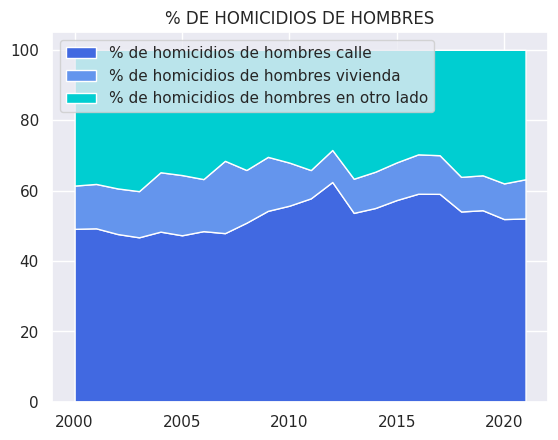

In [13]:
years=list(range(2000, 2022))
plt.stackplot(years,tasas_H_C, tasas_H, tasas_H_O,  
              labels=['% de homicidios de hombres calle','% de homicidios de hombres vivienda','% de homicidios de hombres en otro lado'],
              colors=["#4169E1","#6495ED", "#00CED1"])
plt.legend(loc='upper left')
plt.title('% DE HOMICIDIOS DE HOMBRES') #Título del gráfico

Text(0.5, 1.0, '% DE HOMICIDIOS DE HOMBRES')

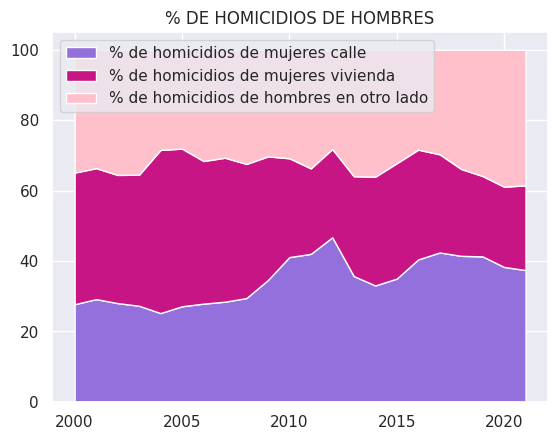

In [14]:
years=list(range(2000, 2022))
plt.stackplot(years,tasas_M_C, tasas_M, tasas_M_O, 
              labels=['% de homicidios de mujeres calle','% de homicidios de mujeres vivienda','% de homicidios de hombres en otro lado'],
              colors=["#9370DB","#C71585", "#FFC0CB"])
plt.legend(loc='upper left')
plt.title('% DE HOMICIDIOS DE HOMBRES') #Título del gráfico

##Tasas de homicicios según lugar de ocurrencia

Tasa x 100,000 habitantes= (No. Total de homicidios/Población total)*100,000

In [15]:
#VÍA PÚBLICA
Homicidios_H=[]
Homicidios_M=[]
tasas_Hom_C=[]
tasas_Muj_C=[]
j=0
for i in range(0,len(df_Homicidio)-33,33):
  tasas_Hom_C.append((hom_C[j]/float(df_PT.iloc[i]['HOMBRES']) )*100000 )
  tasas_Muj_C.append((muj_C[j]/float(df_PT.iloc[i]['MUJERES']))*100000)
  j=j+1

In [16]:
tasas_Muj_C #Guarda las tasas de toda la república en cada año

[0.7134177751445447,
 0.7393139336698213,
 0.6994532963928473,
 0.6894425716615059,
 0.5754923152182677,
 0.657286577227765,
 0.6663527445753411,
 0.5587180468378055,
 0.7504419164835693,
 1.172164060376305,
 1.723652275592092,
 1.9355668931747294,
 2.1786299870813313,
 1.5747641940438422,
 1.3081765719545184,
 1.3543339978934423,
 1.8271966500324335,
 2.310736762932543,
 2.445260117845194,
 2.5014427631160774,
 2.33534338721255,
 2.2859027735050623]

In [17]:
#Vivienda 
tasas_Hom_V=[]
tasas_Muj_V=[]
j=0
for i in range(0,len(df_Homicidio)-33,33):
  tasas_Hom_V.append((hom_v[j]/float(df_PT.iloc[i]['HOMBRES']) )*100000 )
  tasas_Muj_V.append((muj_v[j]/float(df_PT.iloc[i]['MUJERES']))*100000)
  j=j+1

In [18]:
tasas_Hom_V

[2.4038557680736745,
 2.3206165933590097,
 2.3043939921861236,
 2.2906392627461805,
 2.6967320709225957,
 2.8658444514187127,
 2.597112510333223,
 3.0266428666724803,
 3.517098790920325,
 5.026895452388529,
 5.157950520292655,
 3.4761606720344247,
 3.678151865826927,
 3.4174680172116116,
 3.0907248529314386,
 3.314531240134064,
 4.058052813390282,
 5.1819669799966475,
 5.278524290350478,
 5.230452335549374,
 5.260426519428677,
 5.539540947373502]

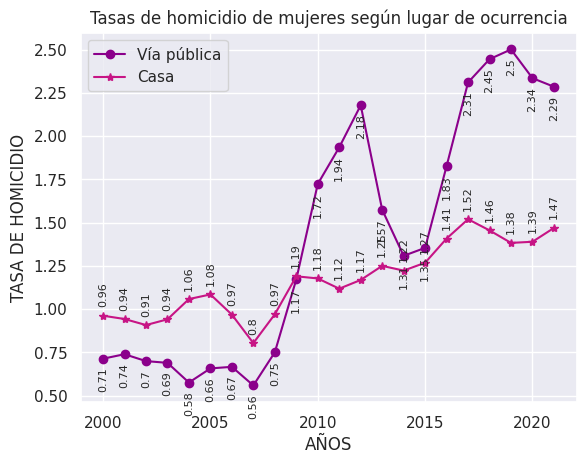

In [52]:
# Modificar el tamaño de la letra
plt.rcParams.update({'font.size': 8})

plt.plot(years,tasas_Muj_C, label='Vía pública', color='#8B008B', marker='o')
for x, y in zip(years, tasas_Muj_C):
    plt.text(x, y-0.05, f'{round(y, 2)}', ha='center', va='top', rotation=90)

plt.plot(years, tasas_Muj_V, label='Casa', color='#C71585', marker='*')
for x, y in zip(years, tasas_Muj_V):
    plt.text(x, y+0.05, f'{round(y, 2)}', ha='center', va='bottom', rotation=90)

plt.xlabel('AÑOS')#Nombre del eje
plt.ylabel('TASA DE HOMICIDIO')
plt.title('Tasas de homicidio de mujeres según lugar de ocurrencia') #Título del gráfico
plt.grid(True) #Para que se marquen los cuadritos
plt.legend() #Para que se visualicen las labels que establecimos arriba
plt.show()
#plt.savefig("Tasas de homicidio de mujeres por lugar de ocurrencia.png")

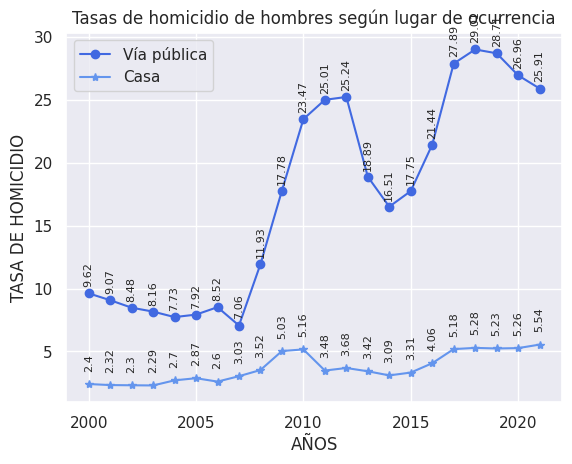

In [51]:
# Modificar el tamaño de la letra
plt.rcParams.update({'font.size': 8})

plt.plot(years,tasas_Hom_C, label='Vía pública', color='#4169E1', marker='o')
for x, y in zip(years, tasas_Hom_C):
    plt.text(x, y+0.5, f'{round(y, 2)}', ha='center', va='bottom', rotation=90)

plt.plot(years, tasas_Hom_V, label='Casa', color='#6495ED', marker='*')
for x, y in zip(years, tasas_Hom_V):
    plt.text(x, y+1, f'{round(y, 2)}', ha='center', va='bottom', rotation=90)

plt.xlabel('AÑOS')#Nombre del eje
plt.ylabel('TASA DE HOMICIDIO')
plt.title('Tasas de homicidio de hombres según lugar de ocurrencia') #Título del gráfico
plt.grid(True) #Para que se marquen los cuadritos
plt.legend(loc='upper left') #Para que se visualicen las labels que establecimos arriba
plt.show()

##% de homicidios por grupo de edad y sexo

In [56]:
df_LE=pd.read_excel(io.BytesIO(upload["INEGI_LUGAR_EDAD.xls"]), header=0)
df_LE.head(20)

,AÑO,ENTIDAD,EDAD,LUGAR,HOMBRES,MUJER,TOTAL
0,2000,Total,Total,Vivienda particular,1160.0,480.0,1640
1,2000,Total,Total,Calle o carretera (Vía pública),4640.0,356.0,5002
2,2000,Total,Total,Otro,1012.0,107.0,1120
3,2000,Total,Menores de 1 año,Vivienda particular,9.0,7.0,16
4,2000,Total,Menores de 1 año,Calle o carretera (Vía pública),5.0,9.0,17
5,2000,Total,Menores de 1 año,Otro,4.0,1.0,5
6,2000,Total,1-4 años,Vivienda particular,26.0,23.0,49
7,2000,Total,1-4 años,Calle o carretera (Vía pública),17.0,11.0,28
8,2000,Total,1-4 años,Otro,5.0,NaN,5
9,2000,Total,5-9 años,Vivienda particular,22.0,13.0,35


In [ ]:
df_LE.shape

(29398, 7)

In [ ]:
#% DE HOMICIDIOS EN LA VIA PUBLICA
edades = ["Menores de 1 año", "1-4 años", "5-9 años", "10-14 años", "15-19 años", "20-24 años", "25-29 años",
          "30-34 años", "35-39 años", "40-44 años", "45-49 años", "50-54 años", "55-59 años", "60-64 años", 
          "65-69 años", "70-74 años", "75-79 años", "80-84 años","85 años y más"]

h_C=[]#hombres calle
m_C=[]#mujeres calle
j=0
k=0
for i in range(len(df_LE)):
  if df_LE.iloc[i]['LUGAR']=="Calle o carretera (Vía pública)" and df_LE.iloc[i]['EDAD']==edades[k]:
    h_C.append((df_LE.iloc[i]['HOMBRES']/float(df_Homicidio.iloc[j]['Hombre']))*100) 
    m_C.append((df_LE.iloc[i]['MUJER']/float(df_Homicidio.iloc[j]['Mujer']))*100)
    j=j+33
    k=k+1

IndexError: ignored

##GRUPOS DE EDAD

In [53]:
df_Grupos=pd.read_excel(io.BytesIO(upload["Gupos_edad_INEGI_LUGAR_EDAD.xls"]), header=0)
#df que junta homicidios y la población total
df_Grupos

,AÑO,ENTIDAD,GRUPO_EDAD,LUGAR,HOMBRES,MUJERES,TOTAL
0,2000,Total,0-9 años,Vivienda particular,57,43,100
1,2000,Total,0-9 años,Calle o carretera (Vía pública),50,26,79
2,2000,Total,10-19 años,Vivienda particular,80,64,144
3,2000,Total,10-19 años,Calle o carretera (Vía pública),525,55,580
4,2000,Total,20-29 años,Vivienda particular,254,89,343
...,...,...,...,...,...,...,...
347,2021,Total,50-59 años,Calle o carretera (Vía pública),1122,65,1188
348,2021,Total,60-69 años,Vivienda particular,197,72,269
349,2021,Total,60-69 años,Calle o carretera (Vía pública),423,31,454
350,2021,Total,70 y más años,Vivienda particular,148,58,206


In [58]:
edades = ["0-9 años", "10-19 años", "20-29 años", "30-39 años", "40-49 años", "50-59 años", "60-69 años",
          "70 y más años"]

##TASAS DE HOMICIDIOS POR SEXO, GRUPO DE EDAD Y LUGAR DE OCURRENCIA

In [104]:
temp_T_Mu=[]
temp_T_Ho=[]
h=0#hombres 
m=0#mujeres 
MT=[]
HT=[]
j=0
#k=0
c=0

for i in range(0,len(df_P)):
  if (df_P.iloc[i]['SEXO']=='Hombres')and (df_P.iloc[i]['EDAD']<=9)and(c<22):
    h=h+(df_P.iloc[i]['POBLACION'])
    c=c+1
temp_T_Ho.append(h)
h=[]
c=0

In [105]:
temp_T_Ho

[25524877,
 array([], dtype=float64),
 array([], dtype=float64),
 array([], dtype=float64),
 array([], dtype=float64),
 array([], dtype=float64),
 array([], dtype=float64),
 array([], dtype=float64)]

In [72]:
#CALLE
temp_Edad_Mu=[]
temp_Edad_Ho=[]
h=[]#hombres 
m=[]#mujeres 
m_c=[]
h_c=[]
j=0
#k=0
c=0
for edad in range(0, 8,1):
  for i in range(0,len(df_Grupos)):
    if (df_Grupos.iloc[i]['LUGAR']=="Calle o carretera (Vía pública)") and (df_Grupos.iloc[i]['GRUPO_EDAD']==edades[edad])and(c<22):
      h.append((df_Grupos.iloc[i]['HOMBRES']/float(df_Homicidio.iloc[j]['Hombre']))*100)
      m.append(((df_Grupos.iloc[i]['MUJERES'])/float(df_Homicidio.iloc[j]['Mujer']))*100)
      h_c.append(df_Grupos.iloc[i]['HOMBRES'])
      m_c.append(df_Grupos.iloc[i]['MUJERES'])
      j=j+33
      c=c+1
  temp_Edad_Mu.append(m)
  temp_Edad_Ho.append(h)
  m=[]
  h=[]
  j=0
  c=0

In [59]:
temp_Edad_Mu #Guarda el porcentaje de homicidios en la calle de mujeres en un grupo de edad para todos los años y luego pasa al siguiente grupo de edad

[[2.0249221183800623,
  2.1060842433697347,
  2.265625,
  1.2917933130699089,
  1.4925373134328357,
  1.4649190439475714,
  0.7704160246533128,
  1.9390581717451523,
  0.9824561403508772,
  1.3506493506493507,
  0.8684863523573202,
  1.1511325659116227,
  0.759768451519537,
  1.0196374622356497,
  0.5813953488372093,
  0.7973143096936635,
  0.6398862424457874,
  0.40816326530612246,
  0.7462686567164178,
  0.7706139224248651,
  0.32853171594642405,
  0.24987506246876562],
 [4.283489096573208,
  5.694227769110764,
  4.609375,
  5.699088145896656,
  4.892205638474295,
  5.0115651503469545,
  5.778120184899846,
  3.8781163434903045,
  4.771929824561403,
  5.246753246753247,
  5.996691480562448,
  5.792796138135907,
  8.791606367583213,
  5.929003021148036,
  4.3604651162790695,
  5.3294167016365925,
  5.510131532172059,
  5.97667638483965,
  5.143923240938166,
  4.597996403801695,
  4.068738943644175,
  4.172913543228385],
 [6.853582554517133,
  6.6302652106084246,
  7.34375,
  6.68693009

In [75]:
#VIVIENDA

temp_Edad_Mu_v=[]
temp_Edad_Ho_v=[]
h_v=[]#hombres 
m_v=[]#mujeres 
M_V=[]
H_V=[]
j=0
c=0
for edad in range(0, 8,1):
  for i in range(0,len(df_Grupos)):
    if (df_Grupos.iloc[i]['LUGAR']=="Vivienda particular") and (df_Grupos.iloc[i]['GRUPO_EDAD']==edades[edad])and(c<22):
      h_v.append((df_Grupos.iloc[i]['HOMBRES']/float(df_Homicidio.iloc[j]['Hombre']))*100)
      m_v.append(((df_Grupos.iloc[i]['MUJERES'])/float(df_Homicidio.iloc[j]['Mujer']))*100)
      H_V.append(df_Grupos.iloc[i]['HOMBRES'])
      M_V.append(df_Grupos.iloc[i]['MUJERES'])
      j=j+33
      c=c+1
  temp_Edad_Mu_v.append(m_v)
  temp_Edad_Ho_v.append(h_v)
  m_v=[]
  h_v=[]
  j=0
  c=0

In [ ]:
temp_Edad_Mu_v

[[3.348909657320872,
  4.446177847113884,
  2.890625,
  3.7993920972644375,
  5.05804311774461,
  4.163454124903624,
  4.391371340523883,
  3.7857802400738687,
  3.2982456140350878,
  3.5844155844155843,
  2.2332506203473943,
  1.3367991088005942,
  1.7366136034732274,
  2.0392749244712993,
  1.8687707641196014,
  1.888375996642887,
  1.5997156061144686,
  1.1078717201166182,
  1.3059701492537312,
  0.9247367069098381,
  1.288855193328279,
  0.9495252373813095],
 [4.984423676012461,
  4.212168486739469,
  3.5937499999999996,
  4.711246200607903,
  5.638474295190713,
  6.013878180416345,
  4.314329738058552,
  5.078485687903971,
  4.421052631578947,
  3.6363636363636362,
  3.556658395368073,
  2.747864834756777,
  2.4240231548480464,
  2.0392749244712993,
  3.488372093023256,
  3.0214015946286197,
  3.1994312122289372,
  2.4198250728862973,
  2.425373134328358,
  2.132031852042127,
  1.9964619661359615,
  2.1739130434782608],
 [6.931464174454828,
  7.956318252730108,
  8.046875,
  6.914

In [87]:
df_Homicidio.iloc[33]

AÑO        2001
EDO       Total
Hombre     8986
Mujer      1282
Total     10285
Name: 33, dtype: object

In [82]:
m_c[1]+M_V[1]

84

In [88]:
#% DE HOMICIDIOS EN OTRO LADO
temp_Edad_Mu_O=[]
temp_Edad_Ho_O=[]
H_O=[]
M_O=[]
j=0
c=0

for edad in range(0, 8,1):
  for i in range(0,len(df_Homicidio)-33,33):
    #if (df_Grupos.iloc[i]['LUGAR']=="Vivienda particular") and (df_Grupos.iloc[i]['GRUPO_EDAD']==edades[edad])and(c<22):
      H_O.append(((df_Homicidio.iloc[j]['Hombre']-(H_V[c]+h_c[c]))/float(df_Homicidio.iloc[j]['Hombre']))*100)
      M_O.append(((df_Homicidio.iloc[j]['Mujer']-(M_V[c]+m_c[c]))/float(df_Homicidio.iloc[j]['Mujer']))*100)
      j=j+33
      c=c+1
  temp_Edad_Mu_O.append(M_O)
  temp_Edad_Ho_O.append(H_O)
  M_O=[]
  H_O=[]
  j=0


In [86]:
temp_Edad_Mu_O#Guarda los porcentajes de hom de mujeres de grupos de edad de 0-9 para todos los años y luego cambia de grupo de edad y lo calcula para todos los años

[[94.62616822429906,
  93.44773790951638,
  94.84375,
  94.90881458966565,
  93.44941956882255,
  94.3716268311488,
  94.83821263482281,
  94.27516158818098,
  95.71929824561404,
  95.06493506493506,
  96.89826302729529,
  97.51206832528779,
  97.50361794500724,
  96.94108761329305,
  97.54983388704319,
  97.31430969366345,
  97.76039815143974,
  98.48396501457725,
  97.94776119402985,
  98.3046493706653,
  98.3826130907253,
  98.80059970014993],
 [90.73208722741433,
  90.09360374414976,
  91.796875,
  89.58966565349544,
  89.46932006633499,
  88.9745566692367,
  89.90755007704159,
  91.04339796860572,
  90.80701754385964,
  91.11688311688312,
  90.44665012406948,
  91.4593390271073,
  88.78437047756874,
  92.03172205438067,
  92.15116279069767,
  91.64918170373478,
  91.290437255599,
  91.60349854227405,
  92.43070362473348,
  93.26997174415618,
  93.93479909021987,
  93.65317341329336],
 [86.21495327102804,
  85.41341653666147,
  84.609375,
  86.39817629179332,
  83.83084577114428,
 

In [101]:
column_names = ["2000", "2001", "2002", "2003", "2004", "2005", "2006", "2007", "2008", "2009", "2010", "2011",
                "2012", "2013", "2014", "2015", "2016", "2017", "2018", "2019", "2020", "2021"]
df_O = pd.DataFrame(temp_Edad_Mu_O, columns=column_names)
df_O

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,94.626168,93.447738,94.843750,94.908815,93.449420,94.371627,94.838213,94.275162,95.719298,95.064935,...,97.503618,96.941088,97.549834,97.314310,97.760398,98.483965,97.947761,98.304649,98.382613,98.800600
1,90.732087,90.093604,91.796875,89.589666,89.469320,88.974557,89.907550,91.043398,90.807018,91.116883,...,88.784370,92.031722,92.151163,91.649182,91.290437,91.603499,92.430704,93.269972,93.934799,93.653173
2,86.214953,85.413417,84.609375,86.398176,83.830846,85.196608,85.901387,84.672207,84.701754,83.428571,...,81.729378,83.912387,84.136213,81.787663,80.981159,80.466472,81.183369,80.888775,82.410917,83.308346
3,87.772586,87.987520,87.968750,87.386018,87.396352,87.047032,87.519260,86.057248,85.754386,84.415584,...,85.564399,85.989426,86.627907,85.942090,85.282616,83.848397,85.501066,84.407912,85.746778,83.933033
4,92.289720,92.355694,93.359375,91.565350,91.127695,90.824981,90.369800,90.027701,90.035088,91.428571,...,89.797395,91.276435,90.863787,89.928661,89.299680,89.446064,90.964819,90.521449,90.573667,90.904548
5,94.781931,94.461778,94.531250,95.288754,93.200663,93.138011,93.990755,94.736842,94.526316,94.389610,...,94.428365,94.939577,94.684385,94.544692,92.996801,94.256560,93.710021,95.119445,95.425828,95.852074
6,94.548287,96.177847,95.312500,96.352584,96.434494,95.528142,95.916795,97.229917,97.192982,96.467532,...,96.526773,96.034743,96.220930,96.600923,96.907216,96.793003,97.228145,97.328538,97.270660,97.426287
7,94.548287,94.227769,94.375000,94.604863,93.781095,93.909021,94.067797,93.444137,94.947368,95.376623,...,97.069465,96.487915,95.390365,95.551825,95.805190,96.676385,97.787846,97.713845,97.750821,98.150925


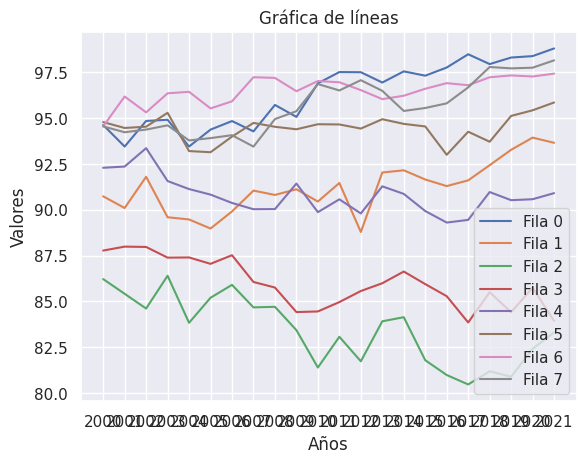

In [102]:
# Crear una figura y un eje
fig, ax = plt.subplots()

# Graficar los datos
ax.plot(df_O.columns, df_O.iloc[0], label='Fila 0')
ax.plot(df_O.columns, df_O.iloc[1], label='Fila 1')
ax.plot(df_O.columns, df_O.iloc[2], label='Fila 2')
ax.plot(df_O.columns, df_O.iloc[3], label='Fila 3')
ax.plot(df_O.columns, df_O.iloc[4], label='Fila 4')
ax.plot(df_O.columns, df_O.iloc[5], label='Fila 5')
ax.plot(df_O.columns, df_O.iloc[6], label='Fila 6')
ax.plot(df_O.columns, df_O.iloc[7], label='Fila 7')

# Agregar título y etiquetas a los ejes
ax.set_title('Gráfica de líneas')
ax.set_xlabel('Años')
ax.set_ylabel('Valores')

# Agregar leyenda
ax.legend()

# Mostrar la gráfica
plt.show()

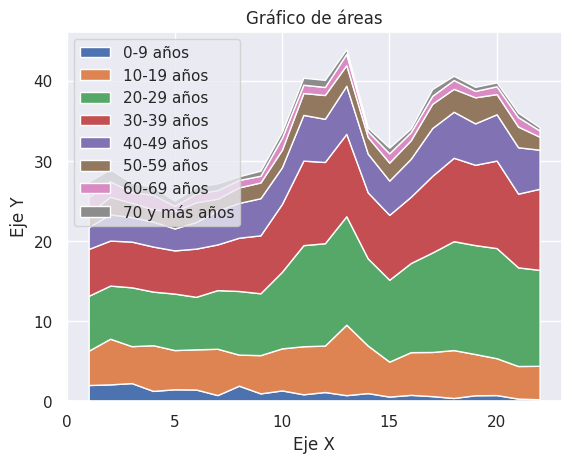

In [100]:
# Crear datos de ejemplo para el eje x
x_c = np.arange(1, len(temp_Edad_Mu[0])+1)
x_v=np.arange(1, len(temp_Edad_Mu_v[0])+1)
x_o=np.arange(1, len(temp_Edad_Mu_O[0])+1)

# Graficar las áreas
plt.stackplot(x_c, temp_Edad_Mu, labels=['0-9 años', '10-19 años', '20-29 años', '30-39 años', '40-49 años', '50-59 años', '60-69 años', '70 y más años'])

# Agregar título y etiquetas de los ejes
plt.title('Gráfico de áreas')
plt.xlabel('Eje X')
plt.ylabel('Eje Y')

# Mostrar la leyenda
plt.legend(loc='upper left')

# Mostrar el gráfico
plt.show()


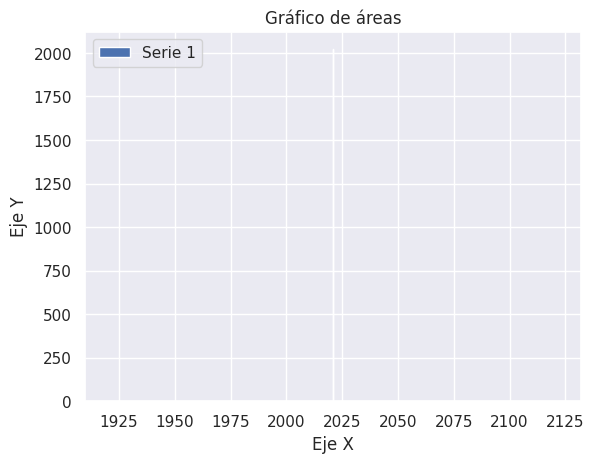

In [92]:
# Crear datos de ejemplo para el eje x
years=list(range(2000, 2022))

# Graficar las áreas
plt.stackplot(x, years, labels=['Serie 1', 'Serie 2', 'Serie 3', 'Serie 4', 'Serie 5', 'Serie 6'])

# Agregar título y etiquetas de los ejes
plt.title('Gráfico de áreas')
plt.xlabel('Eje X')
plt.ylabel('Eje Y')

# Mostrar la leyenda
plt.legend(loc='upper left')

# Mostrar el gráfico
plt.show()

Text(0.5, 1.0, '% DE HOMICIDIOS DE HOMBRES')

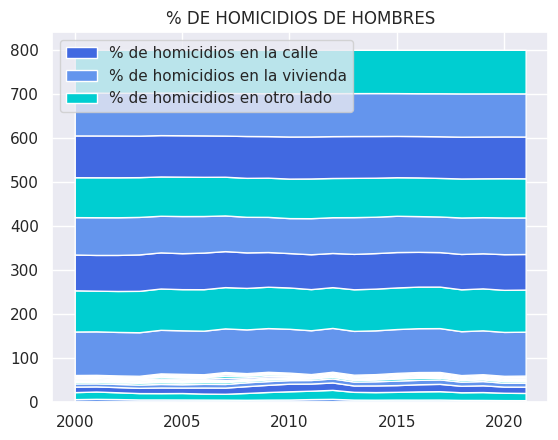

In [90]:
#temp_Edad_Mu_v=[]

years=list(range(2000, 2022))
plt.stackplot(years,temp_Edad_Ho, temp_Edad_Ho_v, temp_Edad_Ho_O,  
              labels=['% de homicidios en la calle','% de homicidios en la vivienda','% de homicidios en otro lado'],
              colors=["#4169E1","#6495ED", "#00CED1"])
plt.legend(loc='upper left')
plt.title('% DE HOMICIDIOS DE HOMBRES') #Título del gráfico

IndexError: ignored

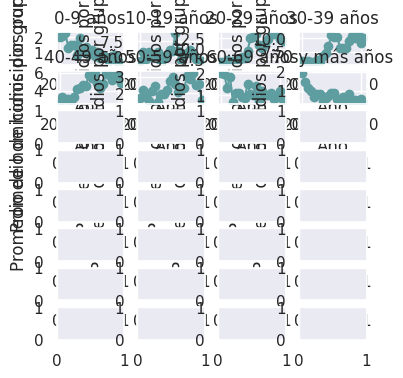

In [89]:
years=list(range(2000, 2022))
# lista de los nombres de los 32 estados de la república mexicana
#states = ['Aguascalientes', 'Baja California', 'Baja California Sur', 'Campeche', 'Chiapas', 'Chihuahua', 'Ciudad de México', 'Coahuila', 'Colima', 'Durango', 'Guanajuato', 'Guerrero', 'Hidalgo', 'Jalisco', 'México', 'Michoacán', 'Morelos', 'Nayarit', 'Nuevo León', 'Oaxaca', 'Puebla', 'Querétaro', 'Quintana Roo', 'San Luis Potosí', 'Sinaloa', 'Sonora', 'Tabasco', 'Tamaulipas', 'Tlaxcala', 'Veracruz', 'Yucatán', 'Zacatecas']
# crear una figura y un conjunto de subtramas para cada estado
fig, axes = plt.subplots(nrows=8, ncols=4, figsize=(4, 4))
# iterar sobre cada subtrama y graficar las tasas de homicidio para cada estado
for i, ax in enumerate(axes.flatten()):
    # obtener las tasas de homicidio para el estado actual
    state_homicides = temp_Edad_Mu[i]

    # crear una lista de años desde 2000 hasta 2021
    years = [year for year in range(2000, 2022)]

    # graficar las tasas de homicidio en función de los años
    ax.plot(years, state_homicides, color='#5F9EA0', marker='o')

    # establecer el título de la subtrama como el nombre del estado
    ax.set_title(edades[i])

    # establecer las etiquetas de los ejes
    ax.set_xlabel("Año")
    ax.set_ylabel("Promedio de homicidios por grupos de edad")

# ajustar el espaciado entre las subtramas
plt.tight_layout()

# mostrar el gráfico
plt.show()

##Tasas de homicidio por sexo y grupos de edad

PRUEBAS

In [ ]:
#Tasas de homicidio por estado
edades = ["Menores de 1 año", "1-4 años", "5-9 años", "10-14 años", "15-19 años", "20-24 años", "25-29 años",
          "30-34 años", "35-39 años", "40-44 años", "45-49 años", "50-54 años", "55-59 años", "60-64 años", 
          "65-69 años", "70-74 años", "75-79 años", "80-84 años","85 años y más"]
Edades_Ho=[]
tasas_Ho=[]
temp_Ho=[]
suma_hombres=0
suma_total=0
i=3
anio=2000

for grupo_edades in edades:
  for anios in years:
    suma_hombres = df_LE.loc[(df_LE['EDAD'] == 'Menores de 1 año') & (df_LE['AÑO'] == 2000), 'HOMBRES'].sum()
    tasas_Ho.append(suma_hombres)
  Edades_Ho.append(tasas_Ho)
  tasas_Ho=[]  

print(Edades_Ho)








[[36.0, 36.0, 36.0, 36.0, 36.0, 36.0, 36.0, 36.0, 36.0, 36.0, 36.0, 36.0, 36.0, 36.0, 36.0, 36.0, 36.0, 36.0, 36.0, 36.0, 36.0, 36.0], [36.0, 36.0, 36.0, 36.0, 36.0, 36.0, 36.0, 36.0, 36.0, 36.0, 36.0, 36.0, 36.0, 36.0, 36.0, 36.0, 36.0, 36.0, 36.0, 36.0, 36.0, 36.0], [36.0, 36.0, 36.0, 36.0, 36.0, 36.0, 36.0, 36.0, 36.0, 36.0, 36.0, 36.0, 36.0, 36.0, 36.0, 36.0, 36.0, 36.0, 36.0, 36.0, 36.0, 36.0], [36.0, 36.0, 36.0, 36.0, 36.0, 36.0, 36.0, 36.0, 36.0, 36.0, 36.0, 36.0, 36.0, 36.0, 36.0, 36.0, 36.0, 36.0, 36.0, 36.0, 36.0, 36.0], [36.0, 36.0, 36.0, 36.0, 36.0, 36.0, 36.0, 36.0, 36.0, 36.0, 36.0, 36.0, 36.0, 36.0, 36.0, 36.0, 36.0, 36.0, 36.0, 36.0, 36.0, 36.0], [36.0, 36.0, 36.0, 36.0, 36.0, 36.0, 36.0, 36.0, 36.0, 36.0, 36.0, 36.0, 36.0, 36.0, 36.0, 36.0, 36.0, 36.0, 36.0, 36.0, 36.0, 36.0], [36.0, 36.0, 36.0, 36.0, 36.0, 36.0, 36.0, 36.0, 36.0, 36.0, 36.0, 36.0, 36.0, 36.0, 36.0, 36.0, 36.0, 36.0, 36.0, 36.0, 36.0, 36.0], [36.0, 36.0, 36.0, 36.0, 36.0, 36.0, 36.0, 36.0, 36.0, 36.0, 

ValueError: ignored

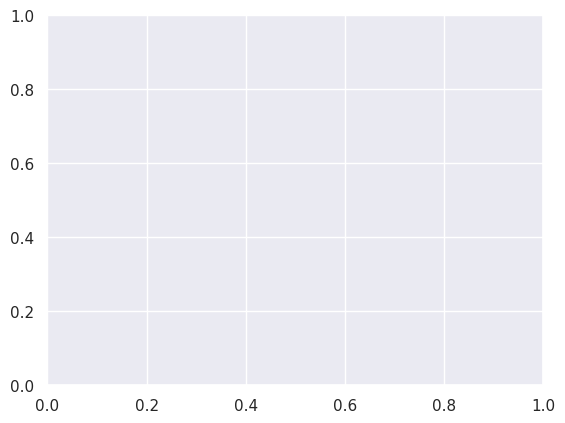

In [ ]:

#years=list(range(2000, 2022))
plt.stackplot(years,tasas_H, tasas_M, labels=['% de homicidios de hombres','% de homicidios de mujeres'])
plt.legend(loc='upper left')
plt.title('% DE HOMICIDIOS EN LA VIVIENDA') #Título del gráfico

In [ ]:
edades = ["menores de 1 año", "1-4", "5-9", "10-14", "15-19", "20-24", "25-29", "30-34", "35-39", "40-44", "45-49", "50-54", "55-59", "60-64", "65-69", "70-74", "75-79", "80-84","85 y más"]

In [ ]:
len(edades)

19